# Your First Neural Network

🎯 Goals of this challenge:
- Writing the architecture of a Neural Network
- Inspect some of the most important hyperparameters of a Neural Network

🌗 In this challenge, we will be working with the **moons dataset**. 
* Your goal is to build a Neural Network which separates two classes. 
* Each data point $X$ has two coordinates $X = (x_1, x_2)$ and belongs to either the class 0 or the class 1
* These bi-dimensional points can be represented on a 2D-scatterplot, using colors to represent to two available classes $\color{blue}{blue}$ and $\color{red}{red} $
* Here is an example of such a moon dataset:

<img src="https://wagon-public-datasets.s3.amazonaws.com/data-science-images/DL/moons_dataset.png" />

## (1)  Generating the Moons dataset

📚 Here, we will use the Scikit-Learn `make_moons` function [(see documentation here)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) to create 2 moons that cannot be linearly separated. 

👉 Each moon corresponds to a class.

In [2]:
from sklearn.datasets import make_moons

### Generating the moons dataset
X, y = make_moons(n_samples=300, noise=0.25, random_state=0)

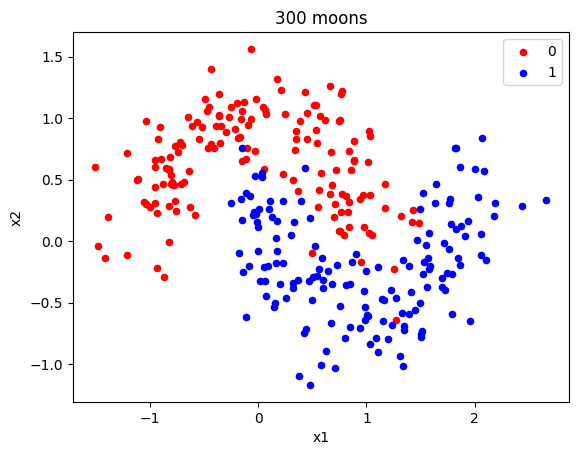

In [3]:
### This function allows to plot the two moons

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def plot_moons(X, y):
    df = pd.DataFrame(dict(x1=X[:,0], x2=X[:,1], label=y))
    colors = {0:'red', 1:'blue'}
    fig, ax = plt.subplots()
    grouped = df.groupby('label')

    for key, group in grouped:
        group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color=colors[key])
        
    
    plt.title(f"{len(X)} moons")
    plt.show()

plot_moons(X, y)

❓  Play with the number of samples and the noise to discover the effects on the `moons dataset` ❓

🎨 Plot the moons for different values.

In [4]:
import numpy as np

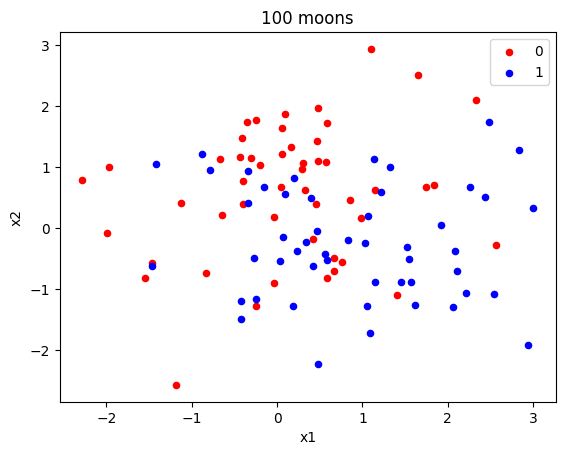

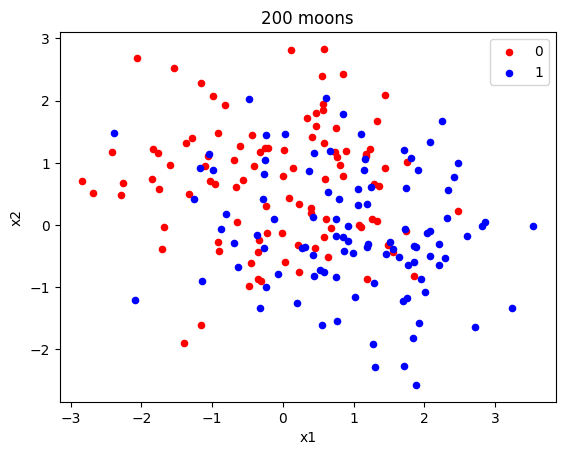

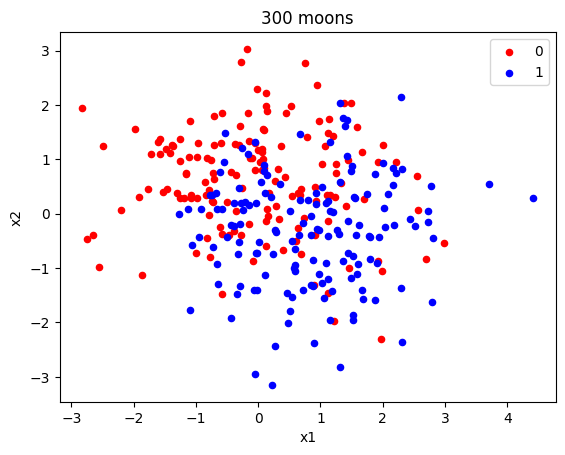

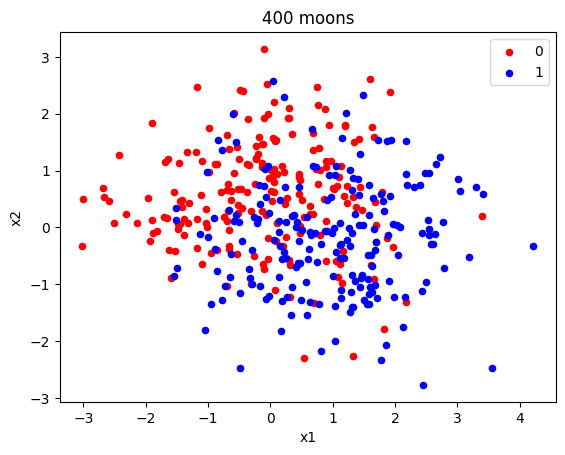

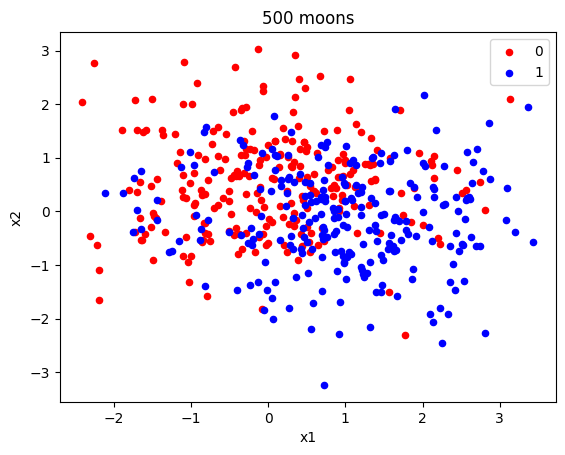

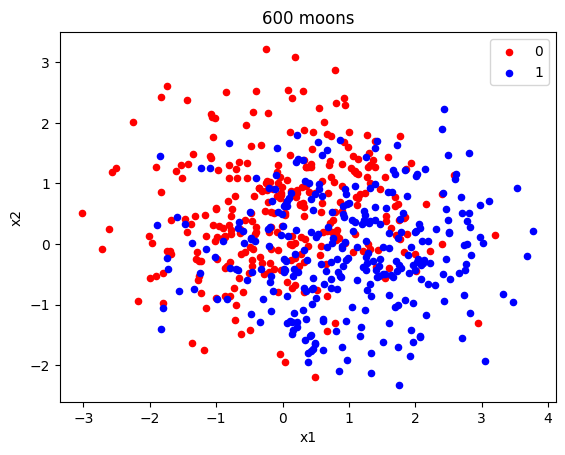

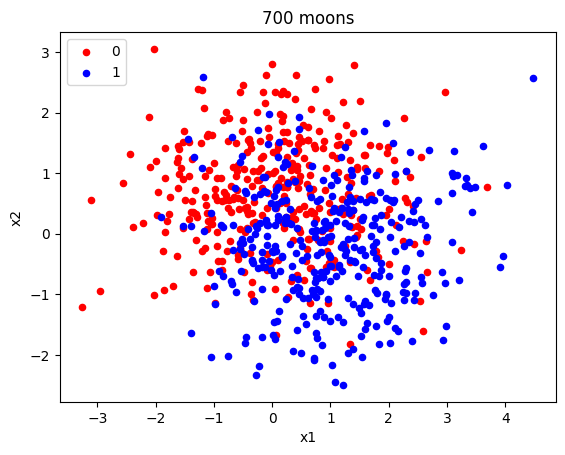

In [5]:
moons = [100,200,300,400,500,600,700]

for moon in moons:
    X, y = make_moons(n_samples=moon, noise=0.9, random_state=0)
    plot_moons(X,y)    

❓ Create 250 samples of the data with ❓
* a noise equal to 0.20
* a random state equal to 0 to get the same results every time you re-run the notebook
* and split the initial dataset into a train and test set (size: 70/30%) 

*Remark* : Please call the variables `X_train`, `y_train`, `X_test` and `y_test`

In [3]:
X, y = make_moons(n_samples=250, noise=0.2, random_state=0)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((175, 2), (75, 2), (175,), (75,))

In [7]:
import numpy as np

In [8]:
np.max(X_test)

2.1709232182614255

## (2) Designing a basic Neural Network  for a binary classification task

🧠 You will now define your first neural network.
The architecture of your model should have: 
- a first layer with:
    - 5 neurons
    - a _relu_ activation function 
    - the correct input dimension
- an output layer suited to your binary classification task.


❓ Complete the next function with the previous architecture ❓

In [9]:
from tensorflow.keras import models, layers

2023-11-13 12:27:46.747561: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
def initialize_model():
    
    #############################
    #  1 - Model architecture   #
    #############################    
    model = models.Sequential()
    model.add(layers.Dense(5, input_dim=2, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
        
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

model = initialize_model()

2023-11-13 12:28:00.556773: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


---

<details>
    <summary><i>Intuitions about the optimization method</i></summary>

We'll keep this message short as you have a full course 📆 **Deep Learning - Optimizers, Loss, Fitting** coming soon.
    
So, briefly speaking:
    
- the ***.compile()*** tells your algorithm how to optimize the weights of your network when fitting the network on real data
    - the ***binary_crossentropy*** is the "log-loss" that you have already seen in Machine Learning in the context of a Logistic Regression for classification
    - To date, the ***adam*** optimizer is the gold standard in Deep Learning - an optimizer in Deep Learning is like a solver in Machine Learning: it provides an iterative method to minimize the loss function of an algorithm with respect to its parameters
    
</details>

---



❓ How many parameters does the model have?  ❓

<details>
    <summary><i>Hint</i></summary>

The `.summary()`method displays:
   - the stack of layers of your Neural Network
   - the output shape after each layer
   - the number of parameters for each layer (and consequently the total number of parameters)
    
</details>


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 15        
                                                                 
 dense_1 (Dense)             (None, 1)                 6         
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________


## (3) Training your Neural Network

❓You are now ready to train your algorithm. 

Let's go! Initialize your model and fit it on the training set! 

Store the results of the training into a `history` variable. ❓

In [12]:
model = initialize_model()

In [13]:
history = model.fit(X_train, y_train, epochs=500, batch_size = 32, verbose=1)

Epoch 1/500
6/6 [==============================] - 1s 2ms/step - loss: 0.5092 - accuracy: 0.7943
Epoch 2/500
6/6 [==============================] - 0s 2ms/step - loss: 0.5038 - accuracy: 0.7943
Epoch 3/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4981 - accuracy: 0.7943
Epoch 4/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7943
Epoch 5/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7943
Epoch 6/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4842 - accuracy: 0.8057
Epoch 7/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4800 - accuracy: 0.8057
Epoch 8/500
6/6 [==============================] - 0s 3ms/step - loss: 0.4760 - accuracy: 0.8114
Epoch 9/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4723 - accuracy: 0.8057
Epoch 10/500
6/6 [==============================] - 0s 2ms/step - loss: 0.4688 - accuracy: 0.8057
Epoch 11/500
6/6 [===========

6/6 [==============================] - 0s 2ms/step - loss: 0.3587 - accuracy: 0.8343
Epoch 85/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3580 - accuracy: 0.8343
Epoch 86/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3574 - accuracy: 0.8343
Epoch 87/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3567 - accuracy: 0.8343
Epoch 88/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.8343
Epoch 89/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3554 - accuracy: 0.8343
Epoch 90/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3547 - accuracy: 0.8343
Epoch 91/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3540 - accuracy: 0.8343
Epoch 92/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3534 - accuracy: 0.8343
Epoch 93/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3527 - accuracy: 0.8343
Epoch 94/500
6/6 [===============

6/6 [==============================] - 0s 2ms/step - loss: 0.3138 - accuracy: 0.8571
Epoch 168/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3134 - accuracy: 0.8571
Epoch 169/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8571
Epoch 170/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3125 - accuracy: 0.8571
Epoch 171/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3120 - accuracy: 0.8571
Epoch 172/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3116 - accuracy: 0.8571
Epoch 173/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3110 - accuracy: 0.8571
Epoch 174/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3107 - accuracy: 0.8571
Epoch 175/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3101 - accuracy: 0.8571
Epoch 176/500
6/6 [==============================] - 0s 2ms/step - loss: 0.3097 - accuracy: 0.8571
Epoch 177/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.2869 - accuracy: 0.8800
Epoch 250/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2867 - accuracy: 0.8800
Epoch 251/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2863 - accuracy: 0.8800
Epoch 252/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2861 - accuracy: 0.8800
Epoch 253/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2859 - accuracy: 0.8800
Epoch 254/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2857 - accuracy: 0.8800
Epoch 255/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2855 - accuracy: 0.8800
Epoch 256/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2852 - accuracy: 0.8800
Epoch 257/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2850 - accuracy: 0.8800
Epoch 258/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2848 - accuracy: 0.8800
Epoch 259/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.2685 - accuracy: 0.8857
Epoch 332/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2682 - accuracy: 0.8857
Epoch 333/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2681 - accuracy: 0.8857
Epoch 334/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2678 - accuracy: 0.8857
Epoch 335/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2676 - accuracy: 0.8857
Epoch 336/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2674 - accuracy: 0.8857
Epoch 337/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2671 - accuracy: 0.8857
Epoch 338/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2669 - accuracy: 0.8857
Epoch 339/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2667 - accuracy: 0.8857
Epoch 340/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2666 - accuracy: 0.8857
Epoch 341/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.2507 - accuracy: 0.8914
Epoch 414/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2504 - accuracy: 0.8914
Epoch 415/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2502 - accuracy: 0.8914
Epoch 416/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2501 - accuracy: 0.8914
Epoch 417/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2497 - accuracy: 0.8914
Epoch 418/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2496 - accuracy: 0.8914
Epoch 419/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2493 - accuracy: 0.8914
Epoch 420/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2491 - accuracy: 0.8914
Epoch 421/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2489 - accuracy: 0.8914
Epoch 422/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2487 - accuracy: 0.8914
Epoch 423/500
6/6 [=====

6/6 [==============================] - 0s 2ms/step - loss: 0.2352 - accuracy: 0.9143
Epoch 496/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2350 - accuracy: 0.9143
Epoch 497/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2349 - accuracy: 0.9143
Epoch 498/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2347 - accuracy: 0.9143
Epoch 499/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.9143
Epoch 500/500
6/6 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.9143


👀 `history` contains information about the training.

❓ Inspect all its attributes using `history.__dict__`. You will notice that you have access to epoch-by-epoch information stored in `history.history`

In [14]:
history.history

{'loss': [0.5091655254364014,
  0.5038134455680847,
  0.4980643689632416,
  0.49334585666656494,
  0.48853355646133423,
  0.4842391908168793,
  0.4800046980381012,
  0.4760438799858093,
  0.472268670797348,
  0.4688125252723694,
  0.46525177359580994,
  0.4619766175746918,
  0.45898446440696716,
  0.4560447335243225,
  0.45306867361068726,
  0.4505622088909149,
  0.4479876756668091,
  0.44537341594696045,
  0.4431919753551483,
  0.44090017676353455,
  0.4385813772678375,
  0.4363825023174286,
  0.4342927038669586,
  0.4319670796394348,
  0.4299887418746948,
  0.4279930889606476,
  0.4257885217666626,
  0.42394256591796875,
  0.42195215821266174,
  0.41988494992256165,
  0.41803044080734253,
  0.41606104373931885,
  0.41420426964759827,
  0.4122473895549774,
  0.41057834029197693,
  0.4084043800830841,
  0.406642884016037,
  0.4049694240093231,
  0.403229296207428,
  0.40158289670944214,
  0.40009936690330505,
  0.39849621057510376,
  0.3969898223876953,
  0.3956967890262604,
  0.394318

❓ Plot the history of the train loss using the following function ❓

In [18]:
def plot_history(history):
    plt.plot(history.history['loss'])
#     plt.plot(history.history['val_loss'])
    plt.title('Train loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.show()

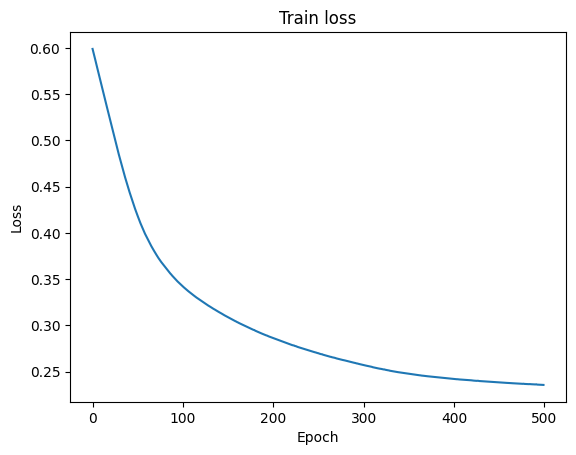

In [19]:
plot_history(history)

❓ What do you observe ❓

> YOUR ANSWER HERE

❗️ <u>Evaluation on unseen data</u> ❗️

🧑🏻‍🏫 A Deep Learning Model is like any other Machine Learning model. Once you've trained it on the training set and are satisfied with how the Neural Network was able to learn, you need to ask: can it be generalized to unseen data such as the test set? 



## (4) Predict & Evaluate performance on test set

❓ Predict the classes of the elements in the training set using _.predict()_ and store these predicted classes into a variable called `y_pred` ❓

In [15]:
X

array([[ 1.39626104e+00, -9.88215773e-02],
       [-1.08218103e+00, -3.06581366e-02],
       [-4.76776689e-01,  7.04088288e-01],
       [ 3.39396447e-01, -1.08428839e-01],
       [ 5.28894543e-01, -7.80694326e-02],
       [ 2.57550962e-01, -2.90768113e-01],
       [ 1.45304697e+00, -6.92673024e-01],
       [-4.27852311e-01,  9.77141541e-01],
       [-1.33326958e-02,  1.10243784e+00],
       [ 1.43771807e-01, -3.25162735e-01],
       [ 1.77806071e+00, -4.93937660e-01],
       [ 1.99215322e+00,  4.99969656e-02],
       [-1.03508548e+00,  4.44912906e-01],
       [ 9.70879802e-01, -6.37815687e-01],
       [-8.19577612e-01,  6.44126759e-01],
       [-1.87321829e-01,  1.08906867e+00],
       [ 1.79752413e+00, -4.67688362e-01],
       [ 3.69014999e-01,  3.05644793e-01],
       [-2.66351456e-01, -4.72671781e-01],
       [-6.74727508e-01,  5.91742668e-01],
       [ 3.45613657e-01, -6.08535963e-02],
       [ 4.63123076e-01,  5.02968009e-01],
       [ 2.14737734e+00,  1.63252517e-01],
       [-1.

In [16]:
y_pred = model.predict(X_test)

3/3 [==============================] - 0s 2ms/step


❓ What are your _loss_ and your _accuracy_ on the test set ❓ 

💡 In other words, you are asked to evaluate your Deep Learning model!

In [38]:
res = model.evaluate(X_test, y_test, verbose=0)

res

[0.2724791467189789, 0.8533333539962769]

In [39]:
loss = res[0]
accuracy = res[1]

**🧪 Test your code**

In [40]:
from nbresult import ChallengeResult
result = ChallengeResult('first_model', accuracy=accuracy)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-your-first-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_first_model.py::TestFirstModel::test_accuracy PASSED                [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/first_model.pickle

git commit -m 'Completed first_model step'

git push origin master



❓ Check the accuracy of your predictions visually by using our `plot_decision_regions` available in `utils/plots.py` ❓

In [41]:
from utils.plots import plot_decision_regions

1940/1940 [==============================] - 1s 563us/step


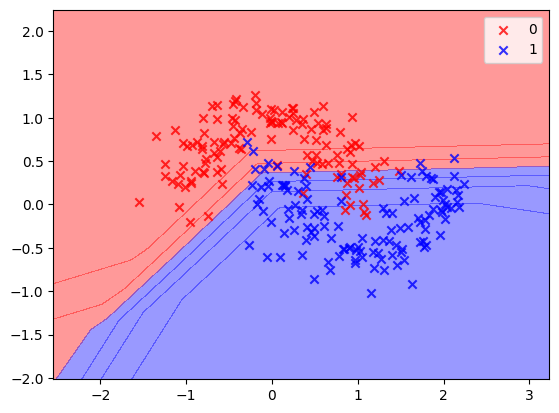

In [42]:
plot_decision_regions(X,y,model)

😥 It looks like we are **underfitting** a bit, right? 

😁 We can try :
- to train the model a bit longer...
- ...or maybe to create a Deeper Neural network in the next section!

## (5) Training your Neural Network with more epochs

❓ Re-train the model for 500 iterations ❓
- Don't forget to call the `initialize_model` function, otherwise, your initial parameters will be those you have already learned on the previous _.fit()_ ...!)
- Plot the history to see how the loss changed over the different epochs/iterations.

In [43]:
model2 = initialize_model()

In [44]:
history = model2.fit(X_train, y_train, validation_split=0.3, epochs=500, batch_size = 8, verbose=1)

Epoch 1/500
16/16 [==============================] - 1s 11ms/step - loss: 1.2263 - accuracy: 0.4836 - val_loss: 1.0586 - val_accuracy: 0.5660
Epoch 2/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1830 - accuracy: 0.4918 - val_loss: 1.0289 - val_accuracy: 0.5660
Epoch 3/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1435 - accuracy: 0.4918 - val_loss: 1.0019 - val_accuracy: 0.5660
Epoch 4/500
16/16 [==============================] - 0s 3ms/step - loss: 1.1058 - accuracy: 0.5082 - val_loss: 0.9746 - val_accuracy: 0.5660
Epoch 5/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0702 - accuracy: 0.5164 - val_loss: 0.9488 - val_accuracy: 0.5660
Epoch 6/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0366 - accuracy: 0.5246 - val_loss: 0.9241 - val_accuracy: 0.5660
Epoch 7/500
16/16 [==============================] - 0s 3ms/step - loss: 1.0027 - accuracy: 0.5492 - val_loss: 0.9013 - val_accuracy: 0.5849
Epoch 8/500


Epoch 59/500
16/16 [==============================] - 0s 2ms/step - loss: 0.4034 - accuracy: 0.8033 - val_loss: 0.4427 - val_accuracy: 0.8491
Epoch 60/500
16/16 [==============================] - 0s 2ms/step - loss: 0.4003 - accuracy: 0.8033 - val_loss: 0.4387 - val_accuracy: 0.8491
Epoch 61/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3977 - accuracy: 0.8033 - val_loss: 0.4355 - val_accuracy: 0.8491
Epoch 62/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8115 - val_loss: 0.4332 - val_accuracy: 0.8491
Epoch 63/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3923 - accuracy: 0.8115 - val_loss: 0.4296 - val_accuracy: 0.8491
Epoch 64/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3896 - accuracy: 0.8115 - val_loss: 0.4263 - val_accuracy: 0.8491
Epoch 65/500
16/16 [==============================] - 0s 2ms/step - loss: 0.3869 - accuracy: 0.8115 - val_loss: 0.4231 - val_accuracy: 0.8491
Epoch 

16/16 [==============================] - 0s 2ms/step - loss: 0.2576 - accuracy: 0.8770 - val_loss: 0.3021 - val_accuracy: 0.9057
Epoch 174/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2571 - accuracy: 0.8852 - val_loss: 0.3017 - val_accuracy: 0.9057
Epoch 175/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2565 - accuracy: 0.8852 - val_loss: 0.3013 - val_accuracy: 0.9057
Epoch 176/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2559 - accuracy: 0.8852 - val_loss: 0.3015 - val_accuracy: 0.9057
Epoch 177/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2554 - accuracy: 0.8770 - val_loss: 0.3012 - val_accuracy: 0.9057
Epoch 178/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2551 - accuracy: 0.8770 - val_loss: 0.3011 - val_accuracy: 0.9057
Epoch 179/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2543 - accuracy: 0.8770 - val_loss: 0.3005 - val_accuracy: 0.9057
Epoch 180/500

16/16 [==============================] - 0s 2ms/step - loss: 0.2225 - accuracy: 0.8934 - val_loss: 0.2878 - val_accuracy: 0.8868
Epoch 288/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2224 - accuracy: 0.8934 - val_loss: 0.2879 - val_accuracy: 0.8868
Epoch 289/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2221 - accuracy: 0.8934 - val_loss: 0.2878 - val_accuracy: 0.8868
Epoch 290/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2220 - accuracy: 0.8934 - val_loss: 0.2878 - val_accuracy: 0.8868
Epoch 291/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2218 - accuracy: 0.8934 - val_loss: 0.2877 - val_accuracy: 0.8868
Epoch 292/500
16/16 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.8934 - val_loss: 0.2877 - val_accuracy: 0.8868
Epoch 293/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2215 - accuracy: 0.8934 - val_loss: 0.2877 - val_accuracy: 0.8868
Epoch 294/500

16/16 [==============================] - 0s 3ms/step - loss: 0.2118 - accuracy: 0.9098 - val_loss: 0.2879 - val_accuracy: 0.8868
Epoch 402/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2118 - accuracy: 0.9098 - val_loss: 0.2880 - val_accuracy: 0.8868
Epoch 403/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9098 - val_loss: 0.2879 - val_accuracy: 0.8868
Epoch 404/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2116 - accuracy: 0.9098 - val_loss: 0.2881 - val_accuracy: 0.8868
Epoch 405/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9098 - val_loss: 0.2882 - val_accuracy: 0.8868
Epoch 406/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2121 - accuracy: 0.9098 - val_loss: 0.2882 - val_accuracy: 0.8868
Epoch 407/500
16/16 [==============================] - 0s 2ms/step - loss: 0.2117 - accuracy: 0.9098 - val_loss: 0.2880 - val_accuracy: 0.8868
Epoch 408/500

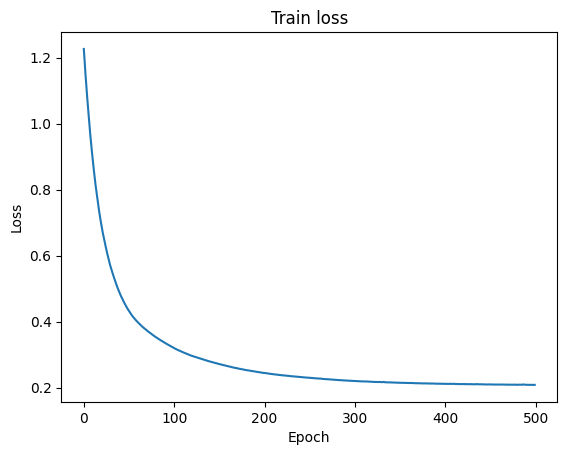

In [45]:
plot_history(history)

❓ Did the test accuracy improve? ❓

In [46]:
res = model.evaluate(X_test, y_test, verbose=0)
res

[0.2724791467189789, 0.8533333539962769]

<details>
    <summary><i>Not really... explanations here</i></summary>

* The accuracy did not increase by training the model with more epochs...
* So when should have we stopped the training of this Deep Learning Model?
    * Answer in the next chapter <b><i>Deep Learning - Optimizers, Loss and Fitting</i></b>
    
</details>

## (6) A Deeper Deep Learning Model

❓ Let's try a **deeper** architecture that includes the following layers:

- a first layer with 20 neurons (activation: `"relu"`)
- a second layer with 10 neurons (activation: `"relu"`)
- a third layer with 5 neurons (activation: `"relu"`)
- an output layer suitable for this problem ❓


In [48]:
def initialize_model_2():
    
    #############################
    #  1 - Model architecture   #
    #############################   
    
    model = models.Sequential()
    
    model.add(layers.Dense(20, input_dim=2, activation='relu'))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    #############################
    #  2 - Optimization Method  #
    #############################
    model.compile(loss='binary_crossentropy', # We've already mentioned this loss function in Logistic Regression
                  optimizer='adam', # Optimizer in Deep Learning = solver in Machine Learning | Adam = our best friend
                  metrics=['accuracy']) # Let's focus on the accuracy, our dataset is balanced
    
    return model

In [49]:
model = initialize_model_2()

❓ What is the number of parameters of your new model ❓

In [50]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                60        
                                                                 
 dense_7 (Dense)             (None, 10)                210       
                                                                 
 dense_8 (Dense)             (None, 5)                 55        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 331
Trainable params: 331
Non-trainable params: 0
_________________________________________________________________


❓ Run your model on the previous dataset for 500 epochs and plot the loss afterwards ❓

In [1]:
model = initialize_model_2()

history = model.fit(
            X_train, y_train,
            validation_split=0.3,
            epochs=500,
            batch_size=8,
            verbose=2)

NameError: name 'initialize_model_2' is not defined

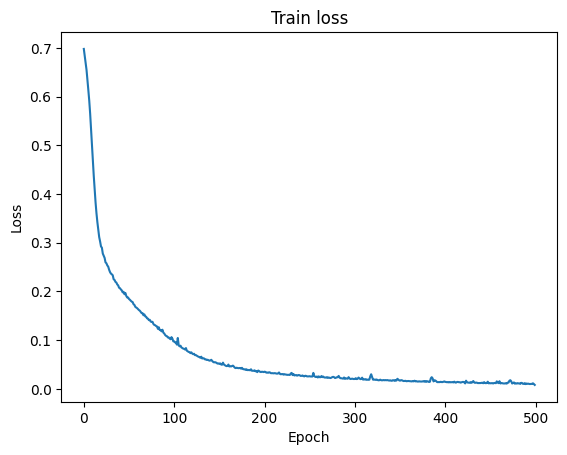

In [52]:
plot_history(history)

❓ What is your accuracy on the test test ? Store it as `accuracy_deep` variable (`float`) ❓

In [53]:
res = model.evaluate(X_test, y_test)
res[1]

3/3 [==============================] - 0s 2ms/step - loss: 0.4238 - accuracy: 0.9333


0.9333333373069763

In [54]:
accuracy_deep = res[1]

🧪 **Test your code**

In [55]:
from nbresult import ChallengeResult
result = ChallengeResult('deeper_model',
                         accuracy=accuracy_deep)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/bingobango/.pyenv/versions/tom/bin/python3
cachedir: .pytest_cache
rootdir: /Users/bingobango/code/lewagon/data-your-first-neural-network/tests
plugins: anyio-3.6.1, asyncio-0.19.0, typeguard-2.13.3
asyncio: mode=strict
collecting ... collected 1 item

test_deeper_model.py::TestDeeperModel::test_accuracy PASSED              [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/deeper_model.pickle

git commit -m 'Completed deeper_model step'

git push origin master



❓ Do you think we are overfitting on the noise ❓ Once again, use the `plot_decision_regions` function to help your intuition.

1940/1940 [==============================] - 1s 591us/step


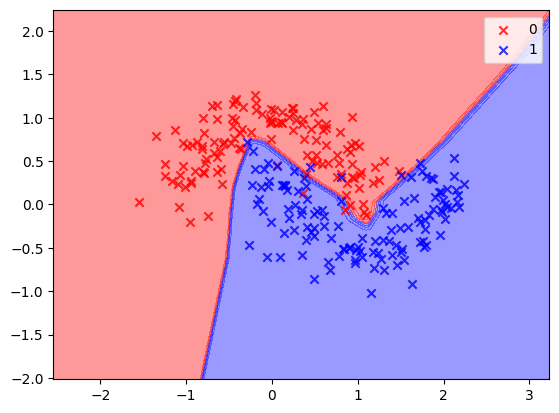

In [56]:
plot_decision_regions(X,y,model)

---

🏁 Congratulations!

💾 Don't forget to `git add/commit/push` your notebook...

🚀 ... and move on to the next challenge!